### Detecting Flu Epidemics via Search Engine Query Data 

Flu epidemics constitute a major public health concern causing respiratory illnesses, hospitalizations, and deaths. According to the National Vital Statistics Reports published in October 2012, influenza ranked as the eighth leading cause of death in 2011 in the United States. Each year, 250,000 to 500,000 deaths are attributed to influenza related diseases throughout the world.

The U.S. Centers for Disease Control and Prevention (CDC) and the European Influenza Surveillance Scheme (EISS) detect influenza activity through virologic and clinical data, including Influenza-like Illness (ILI) physician visits. Reporting national and regional data, however, are published with a 1-2 week lag.

The Google Flu Trends project was initiated to see if faster reporting can be made possible by considering flu-related online search queries -- data that is available almost immediately.

#### Problem 1.1 - Understanding the Data

We would like to estimate influenza-like illness (ILI) activity using Google web search logs. Fortunately, one can easily access this data online:

ILI Data - The CDC publishes on its website the official regional and state-level percentage of patient visits to healthcare providers for ILI purposes on a weekly basis.

Google Search Queries - Google Trends allows public retrieval of weekly counts for every query searched by users around the world. For each location, the counts are normalized by dividing the count for each query in a particular week by the total number of online search queries submitted in that location during the week. Then, the values are adjusted to be between 0 and 1.

The csv file FluTrain.csv aggregates this data from January 1, 2004 until December 31, 2011 as follows:

"Week" - The range of dates represented by this observation, in year/month/day format.

"ILI" - This column lists the percentage of ILI-related physician visits for the corresponding week.

"Queries" - This column lists the fraction of queries that are ILI-related for the corresponding week, adjusted to be between 0 and 1 (higher values correspond to more ILI-related search queries).

Before applying analytics tools on the training set, we first need to understand the data at hand. Load "FluTrain.csv" into a data frame called FluTrain. Looking at the time period 2004-2011, which week corresponds to the highest percentage of ILI-related physician visits? Select the day of the month corresponding to the start of this week.

In [2]:
FluTrain <- read.csv('FluTrain.csv')
head(FluTrain)

Week,ILI,Queries
2004-01-04 - 2004-01-10,2.418331,0.2377158
2004-01-11 - 2004-01-17,1.809056,0.2204515
2004-01-18 - 2004-01-24,1.712024,0.2257636
2004-01-25 - 2004-01-31,1.542495,0.2377158
2004-02-01 - 2004-02-07,1.437868,0.2244356
2004-02-08 - 2004-02-14,1.324274,0.2071713


In [10]:
str(FluTrain)

'data.frame':	417 obs. of  3 variables:
 $ Week   : Factor w/ 417 levels "2004-01-04 - 2004-01-10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ILI    : num  2.42 1.81 1.71 1.54 1.44 ...
 $ Queries: num  0.238 0.22 0.226 0.238 0.224 ...


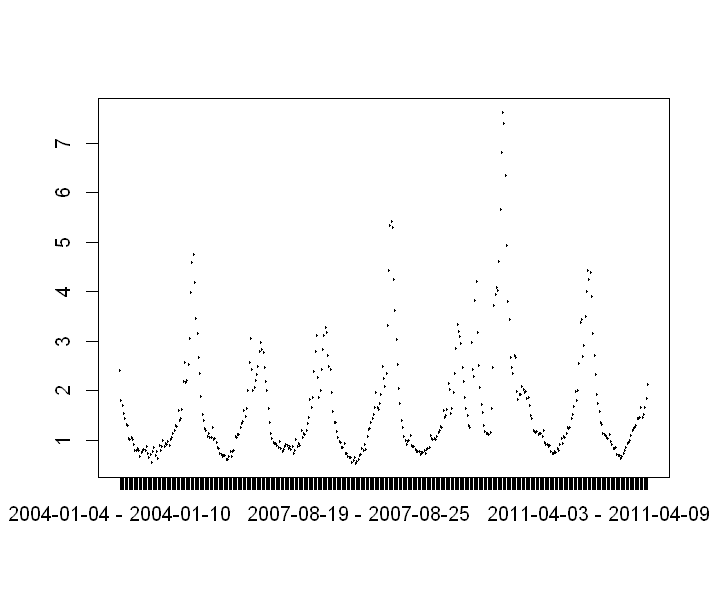

In [17]:
options(repr.plot.width=6, repr.plot.height=5)
plot(FluTrain$Week, FluTrain$ILI)

In [11]:
FluTrain[which(FluTrain$ILI==max(FluTrain$ILI)),]

,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1


Which week corresponds to the highest percentage of ILI-related query fraction?



In [12]:
FluTrain[which(FluTrain$Queries==max(FluTrain$Queries)),]

,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1


#### Problem 1.2 - Understanding the Data

Let us now understand the data at an aggregate level. Plot the histogram of the dependent variable, ILI. What best describes the distribution of values of ILI?

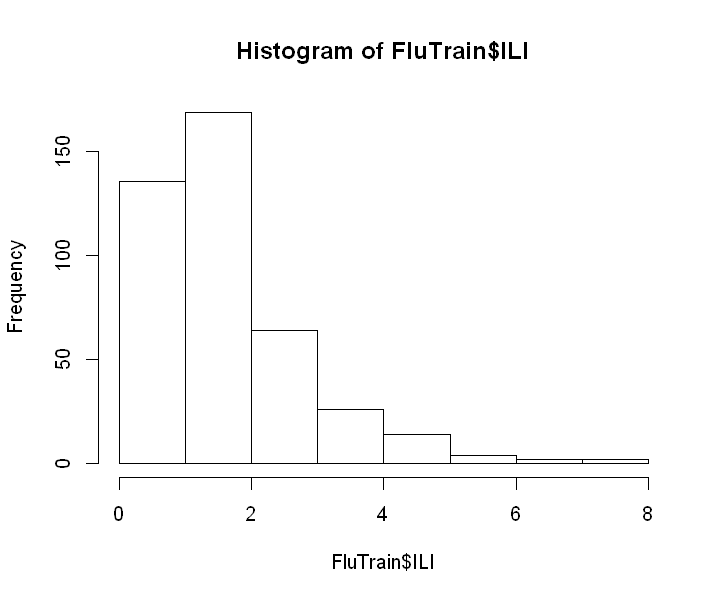

In [18]:

hist(FluTrain$ILI)

#### Problem 1.3 - Understanding the Data

When handling a skewed dependent variable, it is often useful to predict the logarithm of the dependent variable instead of the dependent variable itself -- this prevents the small number of unusually large or small observations from having an undue influence on the sum of squared errors of predictive models. In this problem, we will predict the natural log of the ILI variable, which can be computed in R using the log() function.

Plot the natural logarithm of ILI versus Queries. What does the plot suggest?.

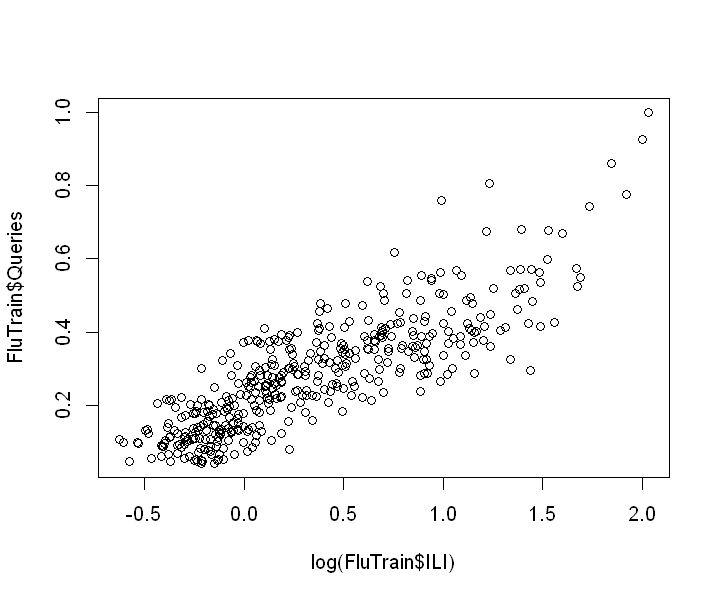

In [19]:
plot(log(FluTrain$ILI), FluTrain$Queries)

#### Problem 2.1 - Linear Regression Model

Based on the plot we just made, it seems that a linear regression model could be a good modeling choice. Based on our understanding of the data from the previous subproblem, which model best describes our estimation problem?

log(ILI) = intercept + coefficient x Queries, where the coefficient is positive 

#### Problem 2.2 - Linear Regression Model

Let's call the regression model from the previous problem (Problem 2.1) FluTrend1 and run it in R. Hint: to take the logarithm of a variable Var in a regression equation, you simply use log(Var) when specifying the formula to the lm() function.

What is the training set R-squared value for FluTrend1 model (the "Multiple R-squared")?

In [21]:
FluTrend1 <- lm(log(ILI) ~ Queries, data=FluTrain)

summary(FluTrend1)$r.squared

[1] 0.7090201

#### Problem 2.3 - Linear Regression Model

For a single variable linear regression model, there is a direct relationship between the R-squared and the correlation between the independent and the dependent variables. What is the relationship we infer from our problem? (Don't forget that you can use the cor function to compute the correlation between two variables.)

In [28]:
x <- cor(log(FluTrain$ILI), FluTrain$Queries)
x^2
log(1/x)
exp(-0.5*x)

[1] 0.7090201

[1] 0.1719357

[1] 0.6563792

Note that the "exp" function stands for the exponential function. The exponential can be computed in R using the function exp().



#### Problem 3.1 - Performance on the Test Set

The csv file FluTest.csv provides the 2012 weekly data of the ILI-related search queries and the observed weekly percentage of ILI-related physician visits. Load this data into a data frame called FluTest.

Normally, we would obtain test-set predictions from the model FluTrend1 using the code

PredTest1 = predict(FluTrend1, newdata=FluTest)

However, the dependent variable in our model is log(ILI), so PredTest1 would contain predictions of the log(ILI) value. We are instead interested in obtaining predictions of the ILI value. We can convert from predictions of log(ILI) to predictions of ILI via exponentiation, or the exp() function. The new code, which predicts the ILI value, is

PredTest1 = exp(predict(FluTrend1, newdata=FluTest))

What is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012? (HINT: You can either just output FluTest$Week to find which element corresponds to March 11, 2012, or you can use the "which" function in R. To learn more about the which function, type ?which in your R console.)

In [24]:
FluTest <- read.csv('FluTest.csv')

In [27]:
PredTest1 = exp(predict(FluTrend1, newdata=FluTest))
head(PredTest1)

1        2        3        4        5        6 
3.520332 2.662689 2.673181 2.510160 2.451624 2.694289

In [31]:
both = cbind(FluTest, PredTest1)
subset(both, Week=='2012-03-11 - 2012-03-17')


,Week,ILI,Queries,PredTest1
11,2012-03-11 - 2012-03-17,2.293422,0.4329349,2.187378


#### Problem 3.2 - Performance on the Test Set

What is the relative error betweeen the estimate (our prediction) and the observed value for the week of March 11, 2012? Note that the relative error is calculated as

(Observed ILI - Estimated ILI)/Observed ILI

In [32]:
(2.293422 - 2.187378)/2.293422

[1] 0.04623833

#### Problem 3.3 - Performance on the Test Set

What is the Root Mean Square Error (RMSE) between our estimates and the actual observations for the percentage of ILI-related physician visits, on the test set?

In [33]:
SSE = sum((PredTest1 - FluTest$ILI)^2)
RMSE = sqrt(SSE / nrow(FluTest))
RMSE
sqrt(mean((PredTest1-FluTest$ILI)^2))

[1] 0.7490645

[1] 0.7490645

#### Problem 4.1 - Training a Time Series Model

The observations in this dataset are consecutive weekly measurements of the dependent and independent variables. This sort of dataset is called a "time series." Often, statistical models can be improved by predicting the current value of the dependent variable using the value of the dependent variable from earlier weeks. In our models, this means we will predict the ILI variable in the current week using values of the ILI variable from previous weeks.

First, we need to decide the amount of time to lag the observations. Because the ILI variable is reported with a 1- or 2-week lag, a decision maker cannot rely on the previous week's ILI value to predict the current week's value. Instead, the decision maker will only have data available from 2 or more weeks ago. We will build a variable called ILILag2 that contains the ILI value from 2 weeks before the current observation.

To do so, we will use the "zoo" package, which provides a number of helpful methods for time series models. While many functions are built into R, you need to add new packages to use some functions. New packages can be installed and loaded easily in R, and we will do this many times in this class. Run the following two commands to install and load the zoo package. In the first command, you will be prompted to select a CRAN mirror to use for your download. Select a mirror near you geographically.

install.packages("zoo")

library(zoo)

After installing and loading the zoo package, run the following commands to create the ILILag2 variable in the training set:

ILILag2 = lag(zoo(FluTrain$ILI), -2, na.pad=TRUE)

FluTrain$ILILag2 = coredata(ILILag2)

In these commands, the value of -2 passed to lag means to return 2 observations before the current one; a positive value would have returned future observations. The parameter na.pad=TRUE means to add missing values for the first two weeks of our dataset, where we can't compute the data from 2 weeks earlier.

How many values are missing in the new ILILag2 variable?

In [34]:
library(zoo)
ILILag2 = lag(zoo(FluTrain$ILI), -2, na.pad=TRUE)
FluTrain$ILILag2 = coredata(ILILag2)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



#### Problem 4.2 - Training a Time Series Model

Use the plot() function to plot the log of ILILag2 against the log of ILI. Which best describes the relationship between these two variables?

#### Problem 4.3 - Training a Time Series Model

Train a linear regression model on the FluTrain dataset to predict the log of the ILI variable using the Queries variable as well as the log of the ILILag2 variable. Call this model FluTrend2.

Which coefficients are significant at the p=0.05 level in this regression model? (Select all that apply.)

What is the R^2 value of the FluTrend2 model?



#### Problem 4.4 - Training a Time Series Model

On the basis of R-squared value and significance of coefficients, which statement is the most accurate?

#### Problem 5.1 - Evaluating the Time Series Model in the Test Set

So far, we have only added the ILILag2 variable to the FluTrain data frame. To make predictions with our FluTrend2 model, we will also need to add ILILag2 to the FluTest data frame (note that adding variables before splitting into a training and testing set can prevent this duplication of effort).

Modify the code from the previous subproblem to add an ILILag2 variable to the FluTest data frame. How many missing values are there in this new variable?

#### Problem 5.2 - Evaluating the Time Series Model in the Test Set

In this problem, the training and testing sets are split sequentially -- the training set contains all observations from 2004-2011 and the testing set contains all observations from 2012. There is no time gap between the two datasets, meaning the first observation in FluTest was recorded one week after the last observation in FluTrain. From this, we can identify how to fill in the missing values for the ILILag2 variable in FluTest.

Which value should be used to fill in the ILILag2 variable for the first observation in FluTest?

Which value should be used to fill in the ILILag2 variable for the second observation in FluTest?




#### Problem 5.3 - Evaluating the Time Series Model in the Test Set

Fill in the missing values for ILILag2 in FluTest. In terms of syntax, you could set the value of ILILag2 in row "x" of the FluTest data frame to the value of ILI in row "y" of the FluTrain data frame with "FluTest$ILILag2[x] = FluTrain$ILI[y]". Use the answer to the previous questions to determine the appropriate values of "x" and "y". It may be helpful to check the total number of rows in FluTrain using str(FluTrain) or nrow(FluTrain).

What is the new value of the ILILag2 variable in the first row of FluTest?

What is the new value of the ILILag2 variable in the second row of FluTest?



#### Problem 5.4 - Evaluating the Time Series Model in the Test Set

Obtain test set predictions of the ILI variable from the FluTrend2 model, again remembering to call the exp() function on the result of the predict() function to obtain predictions for ILI instead of log(ILI).

What is the test-set RMSE of the FluTrend2 model?

#### Problem 5.5 - Evaluating the Time Series Model in the Test Set

Which model obtained the best test-set RMSE?

In this problem, we used a simple time series model with a single lag term. ARIMA models are a more general form of the model we built, which can include multiple lag terms as well as more complicated combinations of previous values of the dependent variable. If you're interested in learning more, check out ?arima or the available online tutorials for these sorts of models.